# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [2]:
import tensorflow as tf

## Get the dataset

In [3]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [5]:
# Pre processing 
print(X_train.shape,Y_train.shape )

(8000, 28, 28) (8000,)


In [6]:
for i in range(10):
  print(Y_train[i])

3
8
7
8
7
4
2
9
5
6


## Visualize the dataset
Print some images with labels.

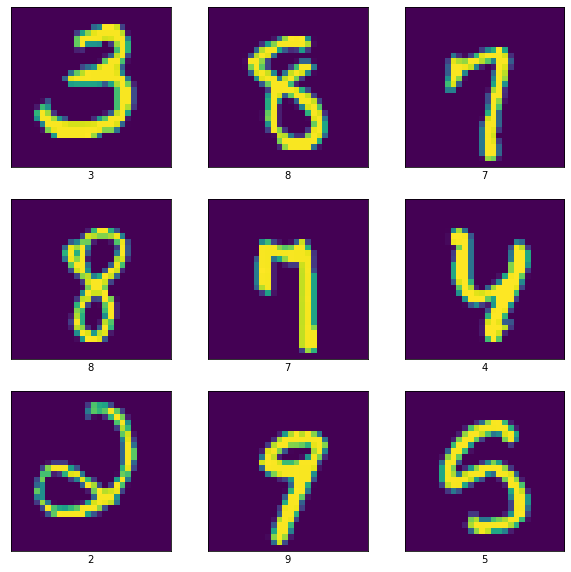

In [7]:
import matplotlib.pyplot as plt

# Your code
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(Y_train[i])

  #plt.show()

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

In [8]:
import numpy as np
unique, counts = np.unique(Y_train, return_counts=True)

print( np.array((unique, counts)).T)


[[  0 779]
 [  1 905]
 [  2 852]
 [  3 787]
 [  4 797]
 [  5 705]
 [  6 767]
 [  7 827]
 [  8 780]
 [  9 801]]


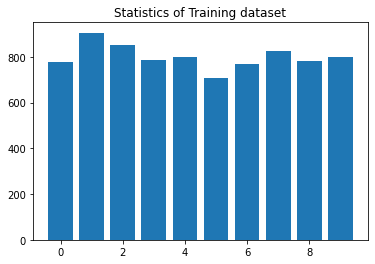

In [9]:
plt.bar(unique,counts)
plt.title("Statistics of Training dataset")
plt.show()

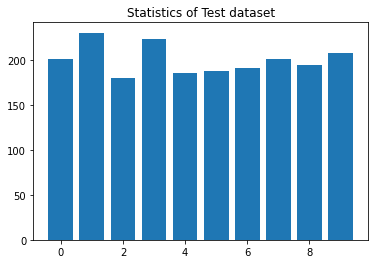

In [10]:
unique, counts = np.unique(Y_test, return_counts=True)
plt.bar(unique,counts)
plt.title("Statistics of Test dataset")
plt.show()

In [11]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

## Model

In [12]:
# model building
# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 
model = models.Sequential()
model.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16,(5,5),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(16,(5,5),activation='relu'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                1

In [16]:
# Compile the model (add optimizers and metrics)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
# Fit the model on the training data (specify validation_split, read about validation if new to you)
history=model.fit(X_train,Y_train,epochs=15,
                 validation_split=0.2)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


200/200 [==============================] - 13s 4ms/step - loss: 3.5083 - accuracy: 0.6498 - val_loss: 0.6863 - val_accuracy: 0.8338
Epoch 2/15
200/200 [==============================] - 1s 3ms/step - loss: 0.4497 - accuracy: 0.8820 - val_loss: 0.5143 - val_accuracy: 0.8763
Epoch 3/15
200/200 [==============================] - 1s 3ms/step - loss: 0.2474 - accuracy: 0.9291 - val_loss: 0.3242 - val_accuracy: 0.9162
Epoch 4/15
200/200 [==============================] - 1s 3ms/step - loss: 0.1646 - accuracy: 0.9497 - val_loss: 0.2786 - val_accuracy: 0.9269
Epoch 5/15
200/200 [==============================] - 1s 4ms/step - loss: 0.0995 - accuracy: 0.9706 - val_loss: 0.2608 - val_accuracy: 0.9312
Epoch 6/15
200/200 [==============================] - 1s 3ms/step - loss: 0.0617 - accuracy: 0.9791 - val_loss: 0.2482 - val_accuracy: 0.9388
Epoch 7/15
200/200 [==============================] - 1s 3ms/step - loss: 0.0440 - accuracy: 0.9852 - val_loss: 0.2274 - val_accuracy: 0.9431
Epoch 8/15
200/2

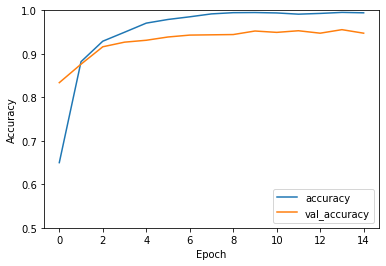

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [19]:
test_loss, test_acc = model.evaluate(X_test,Y_test, verbose=2)
print(test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


63/63 - 0s - loss: 0.3561 - accuracy: 0.9450 - 344ms/epoch - 5ms/step
0.9449999928474426


## Predict some images
Print the image along with its label (true value) and predicted value.

In [24]:
parr=model.predict(X_test[:25])

In [28]:
arr=[]
for i in range(25):
  n=np.where(parr[i]==max(parr[i]))
  arr.append(n)

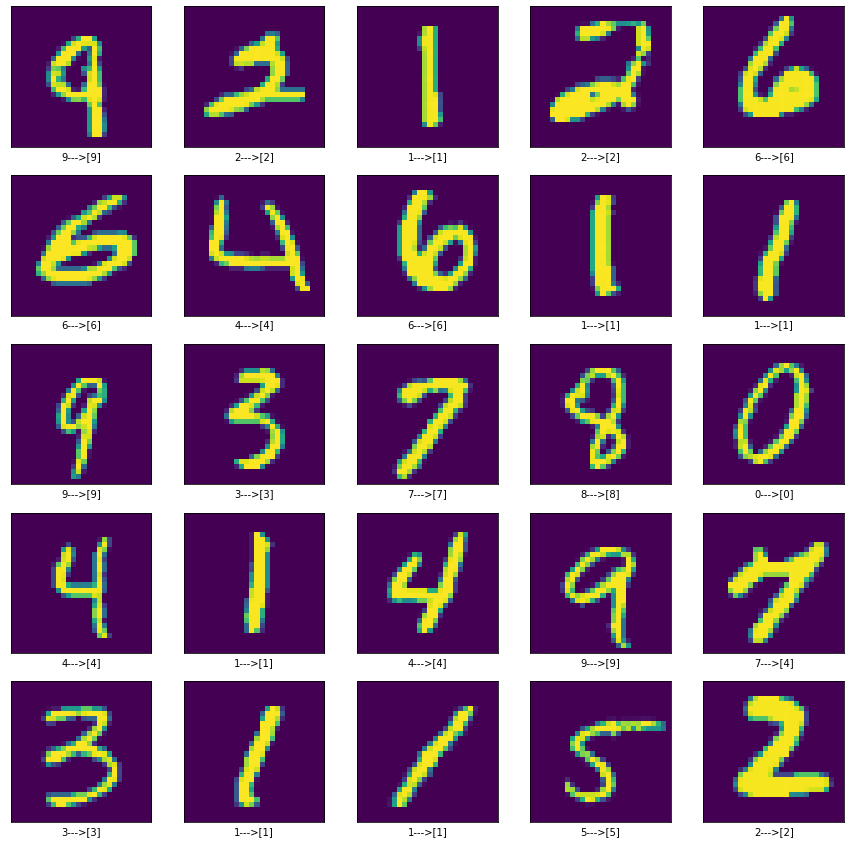

In [33]:
# Your code
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(f"{Y_test[i]}--->{arr[i][0]}")

